In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import json
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from pathlib import Path
import dotenv
import json
dotenv.load_dotenv()
p_code = Path(os.environ.get("HOME_DIR"))
p_data = Path(os.environ.get("DATA_DIR"))

net = 'stepnet'
PATH_YANGNET = os.path.join(p_code,net) 
sys.path.insert(0, PATH_YANGNET)

from tools_lnd import find_opt_clust_num
from task import rules_dict

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
method = 'ward'

In [13]:
# ##################################################################
# #fig save path
# ##################################################################
fig_name = 'suppfig4'
figpath = os.path.join(p_code,'figs',fig_name)
if not os.path.exists(figpath):
    os.makedirs(figpath)

In [14]:
# ##################################################################
# #Find right model dir
# ##################################################################
fig_name = 'suppfig4'
data_m = os.path.join(p_data,fig_name)

In [15]:
def find_nets(data_m,rnn_type,activation,w_init,n_rnn,seed):

    net_name = '_'.join((rnn_type,activation,w_init,n_rnn,'all',seed))
    m = os.path.join(data_m,net_name)
            
    return m

In [18]:
##################################################################
#Find right model dir
##################################################################

seed_set = [str(0),str(1),str(2)]
rnn_type_set = ['LeakyGRU','LeakyRNN']
activation_set = ['softplus','retanh','tanh']
w_init_set = ['diag','randgauss']
data_folder_set = ['all',]
n_rnn_set = [128,256,512,1024]


task_cluster_number = np.empty((len(rnn_type_set),len(activation_set),len(w_init_set),
                                len(n_rnn_set),len(data_folder_set),len(seed_set)),dtype=float)

unit_cluster_number = np.empty((len(rnn_type_set),len(activation_set),len(w_init_set),
                                len(n_rnn_set),len(data_folder_set),len(seed_set)),dtype=float)

for activation_i in range(len(activation_set)):
    for rnn_type_i in range(len(rnn_type_set)):
        for w_init_i in range(len(w_init_set)):
            for data_folder_i in range(len(data_folder_set)):
                for n_rnn_i in range(len(n_rnn_set)):
            
                    activation = activation_set[activation_i]
                    rnn_type = rnn_type_set[rnn_type_i]
                    w_init = w_init_set[w_init_i]
                    data_folder = data_folder_set[data_folder_i]
                    n_rnn = n_rnn_set[n_rnn_i]

                    for seed in seed_set:
                        
                        m = find_nets(data_m,rnn_type,activation,w_init,str(n_rnn),seed)
                        
                        if os.path.isfile(os.path.join(m,'log.json')):
                            with open(os.path.join(m,'log.json'), 'r') as f:
                                log_post = json.load(f)
                            
                            perfs = []
                            for rule in rules_dict['all']:
                                perfs.append(np.max(log_post['perf_'+rule]))
    
                            print(os.path.join(m,'cluster_var.npz'))
                            if np.min(perfs)>.80:
                                if os.path.isfile(os.path.join(m,'cluster_var.npz')):
                                    
                                    cluster_var = np.load(os.path.join(m,'cluster_var.npz'))
                                    D = cluster_var['D'].T
                                    Y = sch.linkage(D.T, method=method)
                                    thresh = find_opt_clust_num(D.T,Y)
                                    clusters_top = fcluster(Y, thresh, criterion='maxclust')
    
                                    unit_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = max(cluster_var['clusters'])
                                    task_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = max(clusters_top)
                                else:
                                    print('NEED TO FIND CLUSTERS ' + os.path.join(rnn_type,activation,w_init,str(n_rnn),str(seed)))
                            else:
                                print ('low perf: '+os.path.join(rnn_type,activation,w_init,str(n_rnn),str(seed)))
                                
                                unit_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = 0
                                task_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = 0
                        else:
                            print('missing data: ' + os.path.join(rnn_type,activation,w_init,str(n_rnn),str(seed)))
                            unit_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = 0
                            task_cluster_number[rnn_type_i,activation_i,w_init_i,n_rnn_i,data_folder_i,int(seed)] = 0
                                

/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_128_all_0/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_128_all_1/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_128_all_2/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_256_all_0/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_256_all_1/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_256_all_2/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_512_all_0/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_512_all_1/cluster_var.npz
/Users/lauradriscoll/Documents/data/flexible_multitask/suppfig4/LeakyGRU_softplus_diag_512_all_2

In [19]:
max_clust_unit = max(unit_cluster_number.flatten())
max_clust_task_period = max(task_cluster_number.flatten())

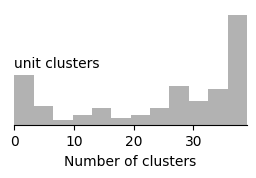

In [20]:
fig = plt.figure(figsize=(3,1.5))         
    
ax = plt.subplot(111)
good_perf = [unit_cluster_number.flatten()>0][0]
plt.hist(unit_cluster_number.flatten()[good_perf],alpha = .3, bins = 12, range = [0,max_clust_unit],color = 'k')
plt.text(0,.5*ax.get_ylim()[1],'unit clusters')

ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim([0,max_clust_unit])
# ax.tick_params(axis='x',label1On=False)

# ax = plt.subplot(2,1,2)
# plt.hist(task_cluster_number.flatten(),alpha = .3, bins = 12, range = [0,max_clust_unit],color = 'k')
# plt.text(0,.5*ax.get_ylim()[1],'task period clusters')

ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlim([0,max_clust_unit])
ax.set_xlabel('Number of clusters')

plt.savefig(os.path.join(figpath,'total.pdf'),bbox_inches='tight')


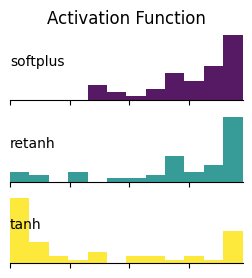

In [21]:
cmap = plt.get_cmap('viridis')
num_var = len(activation_set)
fig = plt.figure(figsize=(3,3))         
    
for act_fxn in range(num_var):
    ax = plt.subplot(num_var,1,act_fxn+1)
    good_perf = [unit_cluster_number[:,act_fxn,:,:,:,:].flatten()>0][0]
    plt.hist(unit_cluster_number[:,act_fxn,:,:,:,:].flatten()[good_perf],alpha = .9, bins = 12, 
             range = [0,max_clust_unit],color = cmap((act_fxn)/(num_var-1)))
    
    activation = activation_set[act_fxn]
    plt.text(0,.5*ax.get_ylim()[1],activation)
    
    ax.set_yticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([0,max_clust_unit])
    
#     if act_fxn<num_var-1:
    ax.tick_params(axis='x',label1On=False)
#     else:
#         ax.set_xlabel('Number of clusters')
       
    if act_fxn==0:
        plt.title('Activation Function')
        
plt.savefig(os.path.join(figpath,'act_fxn.pdf'),bbox_inches='tight')

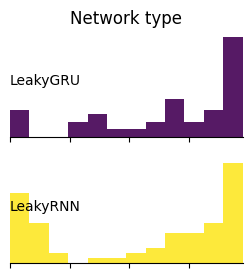

In [22]:
num_var = len(rnn_type_set)
fig = plt.figure(figsize=(3,3))   
                
    
for rnn_type in range(num_var):
    ax = plt.subplot(num_var,1,rnn_type+1)
    good_perf = [unit_cluster_number[rnn_type,:,:,:,:,:].flatten()>0][0]
    plt.hist(unit_cluster_number[rnn_type,:,:,:,:,:].flatten()[good_perf],alpha = .9, bins = 12, 
             range = [0,max_clust_unit],color = cmap((rnn_type)/(num_var-1)))
    
    rnn_type_name = rnn_type_set[rnn_type]
    plt.text(0,.5*ax.get_ylim()[1],rnn_type_name)
    
    ax.set_yticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([0,max_clust_unit])
    
#     if rnn_type<num_var-1:
    ax.tick_params(axis='x',label1On=False)
# #     else:
#         ax.set_xlabel('Number of clusters')
       
    if rnn_type==0:
        plt.title('Network type')
plt.savefig(os.path.join(figpath,'type.pdf'),bbox_inches='tight')

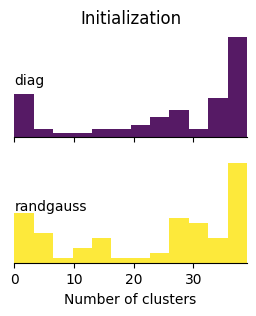

In [23]:
num_var = len(w_init_set)
fig = plt.figure(figsize=(3,3))   
                
    
for init_type in range(num_var):
    ax = plt.subplot(num_var,1,init_type+1)
    good_perf = [unit_cluster_number[:,:,init_type,:,:,:].flatten()>0][0]
    plt.hist(unit_cluster_number[:,:,init_type,:,:,:].flatten()[good_perf],alpha = .9, bins = 12, 
             range = [0,max_clust_unit],color = cmap((init_type)/(num_var-1)))
    
    init_name = w_init_set[init_type]
    plt.text(0,.5*ax.get_ylim()[1],init_name)
    
    ax.set_yticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([0,max_clust_unit])
    
    if init_type<num_var-1:
        ax.tick_params(axis='x',label1On=False)
    else:
        ax.set_xlabel('Number of clusters')
       
    if init_type==0:
        plt.title('Initialization')
plt.savefig(os.path.join(figpath,'Initialization.pdf'),bbox_inches='tight')

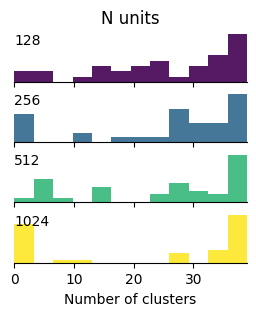

In [24]:
num_var = len(n_rnn_set)
fig = plt.figure(figsize=(3,3))   
                
    
for n_rnn_i in range(num_var):
    ax = plt.subplot(num_var,1,n_rnn_i+1)
    good_perf = [unit_cluster_number[:,:,:,n_rnn_i,:,:].flatten()>0][0]
    plt.hist(unit_cluster_number[:,:,:,n_rnn_i,:,:].flatten()[good_perf],alpha = .9, bins = 12, 
             range = [0,max_clust_unit],color = cmap((n_rnn_i)/(num_var-1)))
    
    init_name = n_rnn_set[n_rnn_i]
    plt.text(0,.75*ax.get_ylim()[1],str(init_name))
    
    ax.set_yticks([])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([0,max_clust_unit])
    
    if n_rnn_i<num_var-1:
        ax.tick_params(axis='x',label1On=False)
    else:
        ax.set_xlabel('Number of clusters')
       
    if n_rnn_i==0:
        plt.title('N units')
        
plt.savefig(os.path.join(figpath,'N_units.pdf'),bbox_inches='tight')

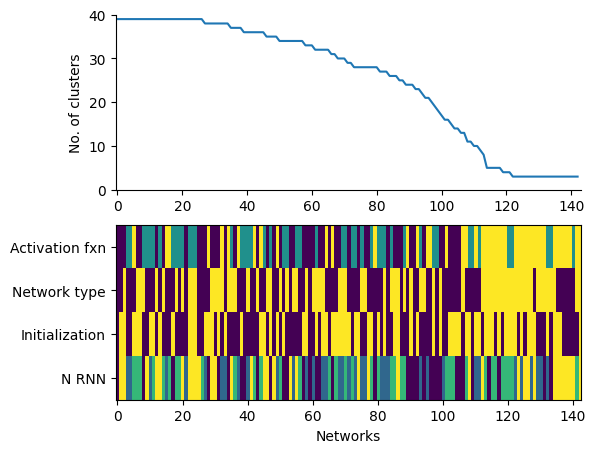

In [25]:
x = unit_cluster_number
good_perf = x.flatten()[x.flatten()>0]
n_networks = len(good_perf)

fig = plt.figure(figsize=(6,5)) 
ax = plt.subplot(2,1,1)
plt.plot(good_perf[np.argsort(-good_perf)])
ax.set_ylabel('No. of clusters')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([0,max_clust_unit+1])
ax.set_xlim([-.5,n_networks])

ax = plt.subplot(2,1,2)
AA,BB,CC,DD,EE,FF = np.meshgrid(np.arange(x.shape[1]),np.arange(x.shape[0]),np.arange(x.shape[2]),np.arange(x.shape[3]),np.arange(x.shape[4]),np.arange(x.shape[5]))
table = np.vstack((x.ravel()/10,AA.ravel(),BB.ravel(),CC.ravel(),DD.ravel())).T

table_sort = table[np.argsort(-x.flatten()),1:]
max_vals = np.max(table_sort,axis = 0)
max_table = np.tile(max_vals,(len(table_sort),1))
table_norm = table_sort/max_table

plt.imshow(table_norm.T, aspect = 'auto')

ax.set_yticks((0,1,2,3))
ax.set_yticklabels(['Activation fxn','Network type','Initialization','N RNN'])
ax.set_xlim([-.5,n_networks-.5])
ax.set_xlabel('Networks')

rnn_type_i,activation_i,w_init_i,int(seed)
plt.savefig(os.path.join(figpath,'summary.pdf'),bbox_inches='tight')